In [13]:
import tkinter
import bt
import talib
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
## Trading Signals

In [15]:
matplotlib.use('TkAgg')
%matplotlib inline


In [2]:
apple_price_data = bt.get('aapl', start='2009-11-01', end='2020-12-01')
apple_price_data

,aapl
Date,
2009-11-02,5.780837
2009-11-03,5.763735
2009-11-04,5.826641
2009-11-05,5.924969
2009-11-06,5.934434
...,...
2020-11-24,114.150986
2020-11-25,115.003372
2020-11-27,115.558418


In [4]:
# Compute Simple Moving Average
sma = apple_price_data.rolling(20).mean()

In [5]:
# Define Pricing Strategy Above SMA
# select where price is above sma
bt_strategy = bt.Strategy('AboveSMA',
                          [
                            bt.algos.SelectWhere(apple_price_data > sma),
                            bt.algos.WeighEqually(),
                            bt.algos.Rebalance()
                          ])

In [6]:
# Create a BackTest with the Strategy and
bt_backtest = bt.Backtest(bt_strategy, apple_price_data)
bt_result = bt.run(bt_backtest)
bt_result


{'AboveSMA': <ffn.core.PerformanceStats at 0x1419011c0>}

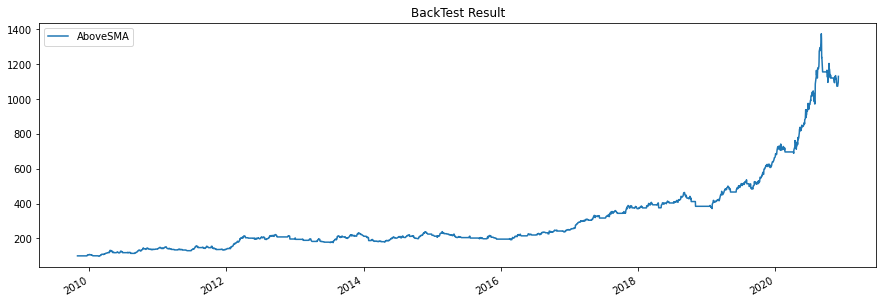

In [16]:
# Lets Plot the bt_result
bt_result.plot(title="BackTest Result")
plt.show()

In [19]:
plt.savefig("Data/btresults_apple.jpg")

FileNotFoundError: [Errno 2] No such file or directory: 'Data/btresults_apple.jpg'

<Figure size 432x288 with 0 Axes>

In [20]:
# Trend Following Signals.
# Get the price data
price_data = bt.get('goog', start='2019-11-1', end='2020-12-1')
# Calculate the SMA
sma = price_data.rolling(20).mean()

In [22]:
# Create EMA indicators and save to pandas dataframe
EMA_short = talib.EMA(price_data['goog'], timeperiod=10).to_frame()
EMA_long = talib.EMA(price_data['goog'], timeperiod=40).to_frame()

In [28]:
signal = EMA_long.copy()
signal[EMA_long.isnull()] = 0
signal

,0
Date,
2019-11-01,0.000000
2019-11-04,0.000000
2019-11-05,0.000000
2019-11-06,0.000000
2019-11-07,0.000000
...,...
2020-11-24,1660.654522
2020-11-25,1666.058206
2020-11-27,1672.259754


In [29]:
signal[EMA_short > EMA_long] = 1
signal[EMA_short < EMA_long] = -1

<AxesSubplot:xlabel='Date'>

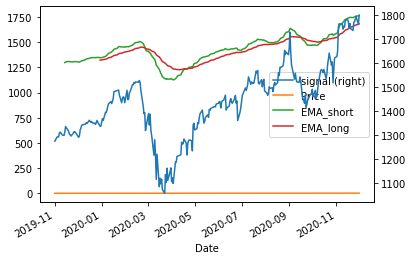

In [34]:
combined_df = bt.merge(price_data, signal,EMA_short, EMA_long)
combined_df.columns = ['signal', 'Price', 'EMA_short', 'EMA_long']
combined_df.plot(secondary_y=['signal'])

In [35]:
combined_df

,signal,Price,EMA_short,EMA_long
Date,,,,
2019-11-01,1273.739990,0.0,NaN,NaN
2019-11-04,1291.369995,0.0,NaN,NaN
2019-11-05,1292.030029,0.0,NaN,NaN
2019-11-06,1291.800049,0.0,NaN,NaN
2019-11-07,1308.859985,0.0,NaN,NaN
...,...,...,...,...
2020-11-24,1768.880005,1.0,1748.646841,1660.654522
2020-11-25,1771.430054,1.0,1752.789243,1666.058206
2020-11-27,1793.189941,1.0,1760.134825,1672.259754


In [36]:
signal

,0
Date,
2019-11-01,0.0
2019-11-04,0.0
2019-11-05,0.0
2019-11-06,0.0
2019-11-07,0.0
...,...
2020-11-24,1.0
2020-11-25,1.0
2020-11-27,1.0


In [37]:
signal.rename(columns = {0:'goog'}, inplace = True)

In [38]:
signal

,goog
Date,
2019-11-01,0.0
2019-11-04,0.0
2019-11-05,0.0
2019-11-06,0.0
2019-11-07,0.0
...,...
2020-11-24,1.0
2020-11-25,1.0
2020-11-27,1.0


In [39]:
bt_strategy = bt.Strategy('EMA_crossover',
                          [
                              bt.algos.WeighTarget(signal),
                              bt.algos.Rebalance()
                          ])

In [40]:
bt_backtest = bt.Backtest(bt_strategy, price_data)
bt_result = bt.run(bt_backtest)

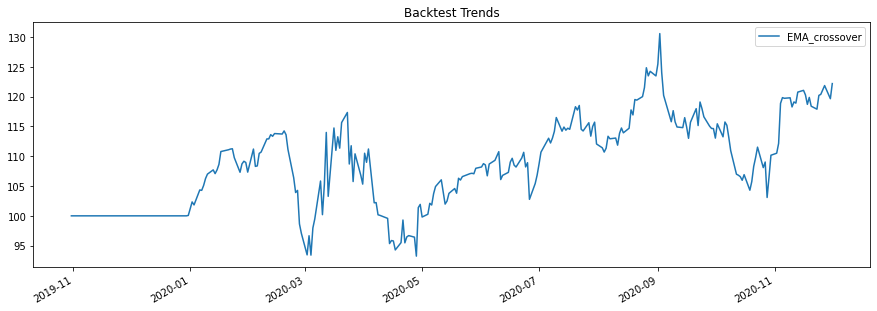

In [42]:
bt_result.plot(title='Backtest Trends')
plt.show()

In [44]:
plt.savefig("abc.jpg")

<Figure size 432x288 with 0 Axes>